# DIVE INTO ALGORITHMS
**Bradford Tuckfield**, No Starch Press, 2021

# Inledning

Vi kan betrakta en algoritm som en endlig mängd regler i en följd av operationer som löser en specifik typ av problem.

Datorer och andra digitala strukturer är bra verktyg till att implementera algoritmer med god precision, men algoritmer i allmänhet är mycket mera allmänna företeelser än specifika datorprogram. 

Dokumentet innehåller:

1. [Russian peasant multiplication](#russian_peasant_multiplication)
2. [Euklids divisionsalgoritm](#divisionsalgoritmen)

<a id='russian_peasant_multiplication'></a>
## Russian Peasant Multiplication (RPM)

Vi vill multiplicera 89 med 18 och vi bildar nu två kolumner, en för *halvering* och en för *dubblering*. 

I halveringskolumnen delar vi nu med 2 och ignorerar resten. Så fortsätter vi tills vi når 1. Och sen dubblerar vi iterativt i den andra kolumnen. Detta ger tabellen nedan.

<img src="images/algorithms01.png" style="width: 300px;"/>

Vi plockar nu bort alla värden i halveringskolumnen som är jämna tal. Och slutligen tar vi summan av det som är kvar i dubbleringskolumnen. Detta ger oss svaret på $89\times18=1602$.

<img src="images/algorithms02.png" style="width: 300px;"/>

Detta fungerar eftersom dubbleringskolonnen består av en summa av $2^a$ multipler av 18 och mera specifikt ser vi att vi har

$$
(2^0\cdot18) + (2^3\cdot18) + (2^4\cdot18) + (2^6\cdot18) = (1+2+4+8+16+32+64)\cdot 18 = 89\cdot18
$$

eftersom vi endast har kvar de $2^a$ som motsvarar jämna tal i halveringskolumnen. Men varför fungerar detta? 

Titta nu på hur tabellen ser ut om vi skriver halveringskolumnen som summor av $2^a$ termer och multiplicerar varje sådan summa med $2^1$. Vidare lägger vi till en term $2^0$ i varje rad där halveringstalet är udda.

<img src="images/algorithms03.png" style="width: 400px;"/>

Numrera nu raderna från 0 till *n* vilket i detta fall ger följden $\{0,1,2,3,4,5,6\}$. Intressant nog är det raderna 0, 3, 4 och 6 som är där vi har lagt till en extra $2^0$, alltså det är raderna där vi har udda halveringstal. Och samtidigt är dessa radnummer exakt samma värden som potenserna i $2^0+2^3+2^4+2^6$ gav oss ovan.

När vi således tar 

$$
18\cdot\left(2^0+2^3+2^4+2^6\right)
$$

är detta helt enkelt produkten av 18 med summan av de potenser av 2 som ger 89. Men detta måste då motsvara summan av exakt de raderna i dubbleringskolumnen som innehåller just dessa potenser eftersom vi i den kolumnen har brutit ned dubbleringen i termer av formen $18\cdot 2^a$.

Egentligen har vi i denna algoritm en annan algoritm inbakad i form av talet 89 på binär form eftersom 

$$
89 = (1\cdot 2^0) + (0\cdot2^1) + (0\cdot 2^2) + (1\cdot 2^3) + (1\cdot 2^4) + (0\cdot 2^5) + (1\cdot 2^6)
$$
och
$$
89_2 = 1001101
$$

och nu ser vi återigen indirekt, den här gången från positionerna i binära forman av 89, att rad 0, 3, 4 och 6 av dubbleringskolumnen är de som vi summerar ihop.

<a id='the_destination'></a>
### Python implementering

Låt oss implementera detta i Python. 

Det centrala verktyget vi behöver är $\texttt{math.floor}$ så vi kan halvera och runda ned utan att spara någon rest. 

Vi bildar en lista med den af faktorerna som ska halveras och sen använder vi en loop som först halvera och sen lägger till nya värdet i halveringslistan.

Vi har redan sett att algoritmen fungerar för hand med $89\cdot18$, så vi kan börja med att implementera den produkten i Python för att se att det faktiskt fungerar.

In [ ]:
# math biblioteket innehåller funktionen math.floor
import math

# startvärdet i rad 0
h0 = 89

# initiera halveringslistan och inkludera startvärdet 
halvering = [h0]

# loopa genom halveringar av sista värdet i listan tills sista värdet är 1
while halvering[-1] > 1:
    halvering.append(math.floor(halvering[-1]/2))

print(halvering)

Vi vill också bilda en lista för dubblering med startvärdet 18 och vi gör detta enkelt med en loop som utnyttjar antalet element i halveringslistan.

In [ ]:
# startvärdet i rad 0
d0 = 18

# initiera dubbleringslistan och inkludera startvärdet
dubblering = [d0]

# loopa genom dubbleringar av sista värdet i listan len(halvering)-1 antal gånger
# eftersom vi redan har första värdet = d0
for i in range(len(halvering)-1):
    dubblering.append(dubblering[-1]*2)

print(dubblering)

Vi vill nu göra en samlad tabell med våra två listor på samma sätt som vi gjorde för hand ovan. Med Pythons bibliotek $\texttt{pandas}$ kan man lätt göra detta. Vi använder en tvådimensionell dataform som kallas för $\texttt{DataFrame}$ som bland annat har fördelen att den direkt numrerar rader och kolumner från och med index 0. 

Vi bildar tabellen genom att använda funktionen $\texttt{zip}$ som klistrar ihop de två kolumnerna - som när en blixtlås samlar två sidor av en jacka.

Notera att när du kör koden nedan första gången kan det ta en stund innan cellens output visas. Pandaer är lite tröga djur.

In [ ]:
import pandas as pd

rpm_tabell = pd.DataFrame(zip(halvering, dubblering))

print(rpm_tabell)

Det återstår att både plocka bort raderna 1, 2 och 5 från kolumn 0 och sen att summera kvarvarande värden i kolumn 1.

I Pandas har vi en smidig kommando $\texttt{[namn].loc[ ]}$ som specifikt väljer ut de rader en en given kolumn som vi specificerar. Och i det här fallet vill vi komma åt alla rader som *inte* är delbara med 2 eftersom vi från kolumn 0 endast vill ha kvar rader med udda tal. 

För att göra detta kan vi använda Pythons inbyggda $\texttt{modulo}$ funktionalitet och välja alla talen som är 1 modulo 2, alltså alla tal som har en rest 1 när de delas med 2, vilket ju precis är alla udda tal. Alla sådana tal *a* skriver vi $\texttt{a%2 == 1}$.

$\texttt{loc}$ kommandot använder kommas till att separera rader och kolumner och eftersom det är från kolumn 0 vi vill identificera de udda talen är det också på dennas rader att vi gör modulooperationen. *Men* sen är det ju egentligen de kvarvarande värden i kolumn 1 vi vill ha kvar och vi låter alltså $\texttt{loc}$ välja att ha kvar just denna kolonn.

I Python blir detta

In [ ]:
rpm_values = rpm_tabell.loc[rpm_tabell[0]%2 == 1, 1]

Vi använder därmed tabellen till att bilda en ny tabell som bara är *en* kolumn med precis de värden vi vill summera.

Man kan nu direkt i Pandas summera alla värden i rpm_values tabellen men säg att vi gärna vill ha en array med värden först av någon anledning, till exempel om vi vill göra något annat med data eller vi vill spara dem i ett format vi lätt kan använda i loops och liknande. 

Vi använder därför Pandas $\texttt{.values}$ kommando som gör om DataFramen till en array. 

In [ ]:
rpm_values = rpm_values.values
print(rpm_values)

Slutligen summerar vi alla elementen i rpm_values och nu har vi resultatet av multiplikationen vi söker.

In [ ]:
rpm_svar = sum(rpm_values)
print(f'{h0} * {d0} = {rpm_svar}')

Vi kan nu samla hela koden nedan. I implementeringen vill vi gärna låta användaren kunna bestämma vilken produkt som ska beräknas så vi lägger till några linjer kod med inputmöjligheter samt inkluderar lite pedagogisk text.

In [ ]:
# samlat program för RPM multiplikationsalgoritmen
"""Detta program använder algoritmen Russian Peasant Multiplication (RPM) 
till att beräkna produkten av två tal."""

# math biblioteket innehåller funktionen math.floor
import math

#pandas biblioteket använder vi till att bilda en datatabell av två listor
import pandas as pd

# introducerande text
print('Detta program använder algoritmen Russian Peasant Multiplication (RPM)\n' 
      'till att beräkna produkten av två heltal.')

# halveringslistans startvärde i rad 0
h0 = int(input(f'\nSkriv in det första heltalet i produkten: '))

# initiera halveringslistan och inkludera startvärdet 
halvering = [h0]

# loopa genom halveringar av sista värdet i listan tills sista värdet är 1
while halvering[-1] > 1:
    halvering.append(math.floor(halvering[-1]/2))

# dubbleringsllistans startvärde i rad 0
d0 = int(input(f'\nSkriv in det andra heltalet i produkten: '))

# initiera dubbleringslistan och inkludera startvärdet
dubblering = [d0]

# loopa genom dubbleringar av sista värdet i listan len(halvering)-1 antal gånger
# eftersom vi redan har första värdet = d0
for i in range(len(halvering)-1):
    dubblering.append(dubblering[-1]*2)

print(f'\nBeräknar nu produkten {h0} * {d0}')

# bilda en tabell av de två listorna
rpm_tabell = pd.DataFrame(zip(halvering, dubblering))

# välj bara ut de värden i dubbleringslistan 
# som motsvaras av udda tal i halveringslistan.
rpm_values = rpm_tabell.loc[rpm_tabell[0]%2 == 1, 1]

# gör en array ut av värden vi har kvar från dubbleringslistan
rpm_values = rpm_values.values

# summera värden i arrayen och skriv ut svaret
rpm_svar = sum(rpm_values)
print(f'{h0} * {d0} = {rpm_svar}')

<a id='divisionsalgoritmen'></a>
## Euklids divisionsalgoritm

Vi har två heltal och vi vill nu hitta den största gemensamma delaren mellan dem. Euklids divisionalgoritm löser detta för oss genom att utgå ifrån att någon tal $a$ delat med $b$ antingen har $b$ som en delare av $a$ och då är vi ju egentligen klara, eller också kan vi ta $q_1$ multipler av $b$ och ha kvar en rest $c$. 

Alltså får vi

\begin{equation}\label{division med rest}
    a = q_1b+c
\end{equation}

Resten $c$ är alltid mindre än både $a$ och $b$, annars skulle det inte vara en rest.

$b$ är alltså större än $c$ så tar vi $b/c$ får vi
\begin{equation*}
    b = q_2c+d
\end{equation*}

och i nästa steg
\begin{equation*}
   c = q_3d+e
\end{equation*}

och så vidare.

För varje steg får vi en rest som blir mindre och mindre eftersom resten ju måste vara strikt mindre än talet i VL av ekvationen och detta tal var i sin tur strikt mindre än VL i förra iterationen av ekvationen.

Processen tar slut när vi kommer till resten 0 eftersom då har vi hittat ett tal som måste vara en delare till talet i vänsterledet. Men då måste den sista nollskilda resten vi fick vara största gemensamma delaren till våra två ursprungliga tal. 

Alltså om vi i steg $i$ får
\begin{eqnarray}
    l = q_i m + 0
\end{eqnarray}

dår är $m$ största gemensamma delare (SGD) till $a$ och $b$ om detta var talen vi började med.

Men varför fungerar detta?

Låt oss ta ett exempel med tal då blir det mera konkreta och vi kan bättre övertyga oss om att det bör fungera. Ett egentligt bevis gör vi inte men idéen från det konkreta exemplet bär över till beviset som vi kan göra algebraiskt på ett analogt sätt.

Säg att vi vill bestämma $\text{gcd}(6743, 253)$. Vi får då

\begin{eqnarray*}
    6743 &=& 26 \times 253 + 165 \\
    253 &=& 1 \times 165 + 88 \\
    165 &=& 1\times 88 + 77 \\
    88 &=& 1 \times 77 + 11 \\
    77 &=& 7\times 11 + 0
\end{eqnarray*}

Från detta drar vi slutsatsen att 11 är SGD till 6743 och 253. 

Från processen ovan vet vi att 11 delar 77 (ja, det kanske vi redan visste...) men nu vet vi också att 11 måste vara en delare till 88 eftersom just 11 var resten när vi delade 88 med 77. Eller med andra $7\times11 + 11=88=8\times 11$ (inte heller detta kanske kommer som största överraskningen någonsin...). 

Matematiskt kan vi skriva att talet $u$ är en delare till talet $v$ som $u|v$ och därför kan vi skriva att $11|77$ och $11|88$. Och nu kommer vi till 165 som är summan $88+77$ och det kan inte betyda annat än att $11|(77+88)=11|165$ när 11 var en delare till båda talen i summan som gav oss 165. 

Nu ser du kanske att detta leder oss tillbaka till 6743 och 253 som var talen vi började med. 11 är en delare till alla talen i vänsterleden i uppställningen av algoritmen men ingen av dessa tal är delare till varandra eftersom alla divisionerna ledde till rester. 11 är därför SGD till alla dessa tal och specifikt till de två talen vi började med.

Vi kan nu implementera divisionsalgoritmen i Python. Detta gör vi med en simpel funktion som först ordnar talparet i dividend (talet vi vill dividera) och divisor (talet vi vill dividera med) och sen steg för steg arbetar sig ned till resten noll enligt metoden vi har kommit fram till ovan.

Notera en viktig detalj: algoritmen är *rekursiv* i $\texttt{else:}$ steget. Vi ropar med andra ord på funktionen $\texttt{sgd}$ själv inuti funktionen för att börja om undersökningen av förhållandet mellan dividend och divisor tills funktionens $\texttt{if}$ sats uppfylls.

In [ ]:
# divisionsalgoritmen
def sgd(a, b):
    # automatisera vilken som blir dividend och vilken divisor
    dividend = max(a,b)
    divisor = min(a,b)

    # resten från modulo 'dividend'
    rest = dividend % divisor
    
    if rest == 0:
        return divisor

    # om inte vi direkt hittade SGD sätter vi nu en ny dividend 
    # och diviser från divisorn (som blir dividend) och resten
    # från förra iterationen. 
    else:
        return sgd(divisor,rest)
    
# print(sgd(a, b))

<a id='maximering_minimering'></a>
## Maximering och minimering

Säg att vi har etablerat en liten koloni på en av Jupiters måner men den stora utmaningen är att skaffa tillräckligt med väte till energibehoven i kolonin. Men i vår tid har vätet blivit ett mycket effektivt raketbränsle och vi beslutar därför att en del av vår energibudget ska finansieras från transitavgifter när icke-kolonisters fartyg rör sig genom vår del av solsystemet. De ska helt enkelt betala med en andel av deras fartygs bränsle. Vi frågar vår finansiella konsulter hur vi bäst kan maximera energitillförseln från sådana aktiviteter och de har kommit fram till en funktion som beskriver utvecklingen i sambandet mellan avgiftens och tillförselns storlek. Funktionen är

\begin{equation*}
    f(x) = 0.15\left(\ln{(x+1)} - (x-0.2)^2 + 0.04\right)
\end{equation*}

där $x$ är avgiftssatsen, men normaliserat så 1 är 100\%. Funktionen är således definierad för $x \in[0, 1]$.

Låt oss plotta denna funktion i Python genom att först importera $\texttt{numpy}$ biblioteket så vi kan använda naturliga logaritmen (som bara heter $\texttt{log}$ i Python). Vi definierar funktionen som en Pythonfunktion och bildar två lister, en för avgiften och en för mängden energi vi får. Listen med avgifter innehåller 1000 värden från 0 till 1 så vi får en relativt slät kurva när vi avbildar punkterna i ett koordinatsystem.

Vi kan lägga till lite extra plotspecifikationer så vi både får ett rutnät med högre upplösning och så vi får fler skalstreck på axlarna. Det hjälper oss att avläsa grafen bättre.

Dessutom plottar vi en punkt som visar energitillförseln för ett konkret val av avgift. Plotspecifikationerna för detta anges i koden, men man kan också välja att helt bortse från texten som följer punkten, och man kan även välja en enklare modell där $\texttt{plt.annotate} har en fast placering relativt punkten.

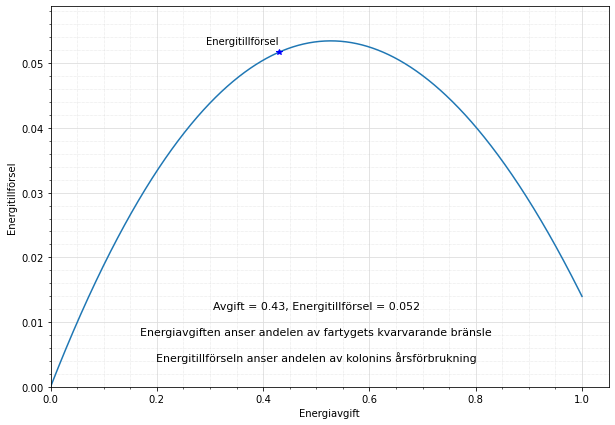

In [321]:
import numpy as np
import matplotlib.pyplot as plt

# funktion som tar variabeln 'avgift' för avgiftssatsen
def energiavgift(avgift):
    y = 0.15*(np.log(avgift + 1) - (avgift - 0.2)**2 + 0.04)
    
    return y

# en array med möjliga avgifter och en array med resulterande energitillförsel
dx = 0.001
avgifter = np.arange(0, 1 + dx, dx)
energi = np.array(energiavgift(avgifter))

# plotta avgiften mot energin - välj en specifik figurstorlek (större än standarden)
plt.figure(figsize=(10, 7))
plt.plot(avgifter, energi)

# plotta en punkt som visar energitillförseln för en vis avgiftsstorlek
x = 0.43
y = energiavgift(x)
plt.plot(x, y, 'b*')

# anpassa punkttexten till punktens placering i koordinatsystemet
text = 'Energitillförsel'
if 0.0 <= x <= 0.25 or 0.60 <= x <= 0.75:
    plt.annotate(text, (x, y),  textcoords="offset points", xytext=(10,3), ha='left')
elif 0.25 < x < 0.60:
    plt.annotate(text, (x, y),  textcoords="offset points", xytext=(-1,8), ha='right')
else:
    plt.annotate(text, (x, y),  textcoords="offset points", xytext=(-7,-5), ha='right')

# namnge koordinat axlarna
plt.xlabel('Energiavgift')
plt.ylabel('Energitillförsel')

# plotta förklaring på axlarna samt en given avgifts energitillförsel
plt.text(0.5, 0.012, f'Avgift = {round(x, 3)}, Energitillförsel = {round(y, 3)}', ha='center', fontsize=11)
plt.text(0.5, 0.008, 'Energiavgiften anser andelen av fartygets kvarvarande bränsle', ha='center', fontsize=11)
plt.text(0.5, 0.004, 'Energitillförseln anser andelen av kolonins årsförbrukning', ha='center', fontsize=11)

# placera ett gitter (grid) i koordinatsystemet med skalstreck (minorticks)
plt.minorticks_on()
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.5)
plt.grid('on')
plt.ylim(0, max(energi)*1.1)
plt.xlim(0, 1.05)

# plotta
plt.show()

Notera att energitillförseln varierar med energiavgiften i en utveckling som ser ut att närmast vara en parabel. Våra konsulter har alltså kommit fram till att energitillförseln inte ökar linjärt om vi ökar avgifterna, vilket kanske kan bero på att det blir fler som tar en omväg genom solsystemet för att undvika vårt område även om de skulle ha fått en positiv gravitationsboost från Jupiter med på köpet. 

Det blir helt enkelt inte lönsamt för främmande skepp att utnyttja en lokal gravitationsslunga om det kostar mer i bränsle än att åka runt oss. Men vi kan också se att vi har en toppunkt på grafen, en storlek på avgifterna som maximerar vår nya kolonis energitillförsel. 

Frågan är nu: Hur maximerar vi energitillförseln med avseende på avgiften som passerande rymdskepp betalar?

Ett sätt att ta reda på detta är att hitta en *extrempunkt* på funktionen som samtidigt är en *lokal maxpunkt*. Extrempunkter vet vi finns där en given funktions förändringshastighet är noll vilket motsvarar att derivatan är noll, alltså:

\begin{equation*}
    \frac{df}{dx} = 0
\end{equation*}

Många problem har inte kända funktioner och därmed har vi inte heller någon derivata vi kan utnyttja. I sådana fall måste vi skapa en algoritm som hanterar en numerisk lösning där vi stegar oss fram och undersöker något villkor för par av datapunkter på funktionen. Men i vårt fall kan vi faktiskt derivera funktionen och uppnå

\begin{equation*}
    \frac{df}{dx} = 0.15\left(\frac{1}{x+1} - 2x + 0.4 \right)
\end{equation*}

Vi skapar nu ett nytt loop som använder funktionens derivata och för varje datapunkt i arrayen $\texttt{avgifter}$ undersöker funktionens derivata. Vi kan inte vara säkra på om vi exakt får $\tfrac{df}{dx}=0$ så vi sätter en minsta gräns $\texttt{epsilon}$ inom vilken vi accepterar att vi är tillräckligt nära. 

Vi låter sen loopen köra tills vi uppfyller villkoret för $\tfrac{df}{dx} < \texttt{epsilon}$ och slutligen skriver vi ut avgiftens optimala storlek i procent. Därmed har vi hittat maxpunkten på funktionen och således optimerad vår avgiftssats.

In [318]:
# derivatan av ursprungsfunktionen
def derivata_avgift(avgift):
    y = 0.15*((avgift+1)**-1 - 2*avgift + 0.4)
    
    return round(y, 3)

# minsta avståndet från df/dx = 0 som vi vill tillåta
epsilon = 0.0001

# loop som på det i:te värdet i avgifter hittar maxpunkten på energiavgift-funktionen
for i in avgifter:
    if derivata_avgift(i) > np.abs(epsilon):
        continue
    else:
        break

print(f'Optimala avgiften är {round(100*(i), 2)}% av fartygets kvarvarande bränsle') 


Optimala avgiften är 52.6% av fartygets kvarvarande bränsle


Observera att när vi börjar med första elementet i 'avgifter' hittar vi med $\texttt{np.abs(epsilon)}$ i regeln den optimala avgiften första gången $\texttt{epsilon}$ uppylls vilket är precis innan funktionens maxpunkt. Om vi satta villkoret till ($-\texttt{epsilon}$) istället då skulle vi hitta värdet bortom maxpunkten, alltså i en punkt där derivatan är negativ så funktionen har börjat avta igen. Detta är priset vi betalar för att låta Python undersöka intervallet numeriskt.